In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [3]:
df=pd.read_csv(r"survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Data Info

In [4]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
df.isna().sum()


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

# Data Cleaning

In [7]:
df=df.fillna('No_data')
df.drop(['Timestamp','comments','state'],axis=1,inplace=True)
df=df[(df['Age']>0)  & (df['Age']<100)]
df['Gender']=df['Gender'].replace({'male':'Male','m':'Male','M':'Male','female':'Female','f':'Female','F':'Female'})
df=df[df['Gender'].isin(['Male','Female'])]
value=df['Country'].value_counts().head(7).index
df['Country']=df['Country'].apply(lambda X:X if X in value else 'Other')
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No_data,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No_data,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No_data,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No_data,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No_data,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,No_data,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,No_data,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


# Data Visualization

## Univariate Analysis

Text(0.5, 0.98, 'Countplot of Different Features')

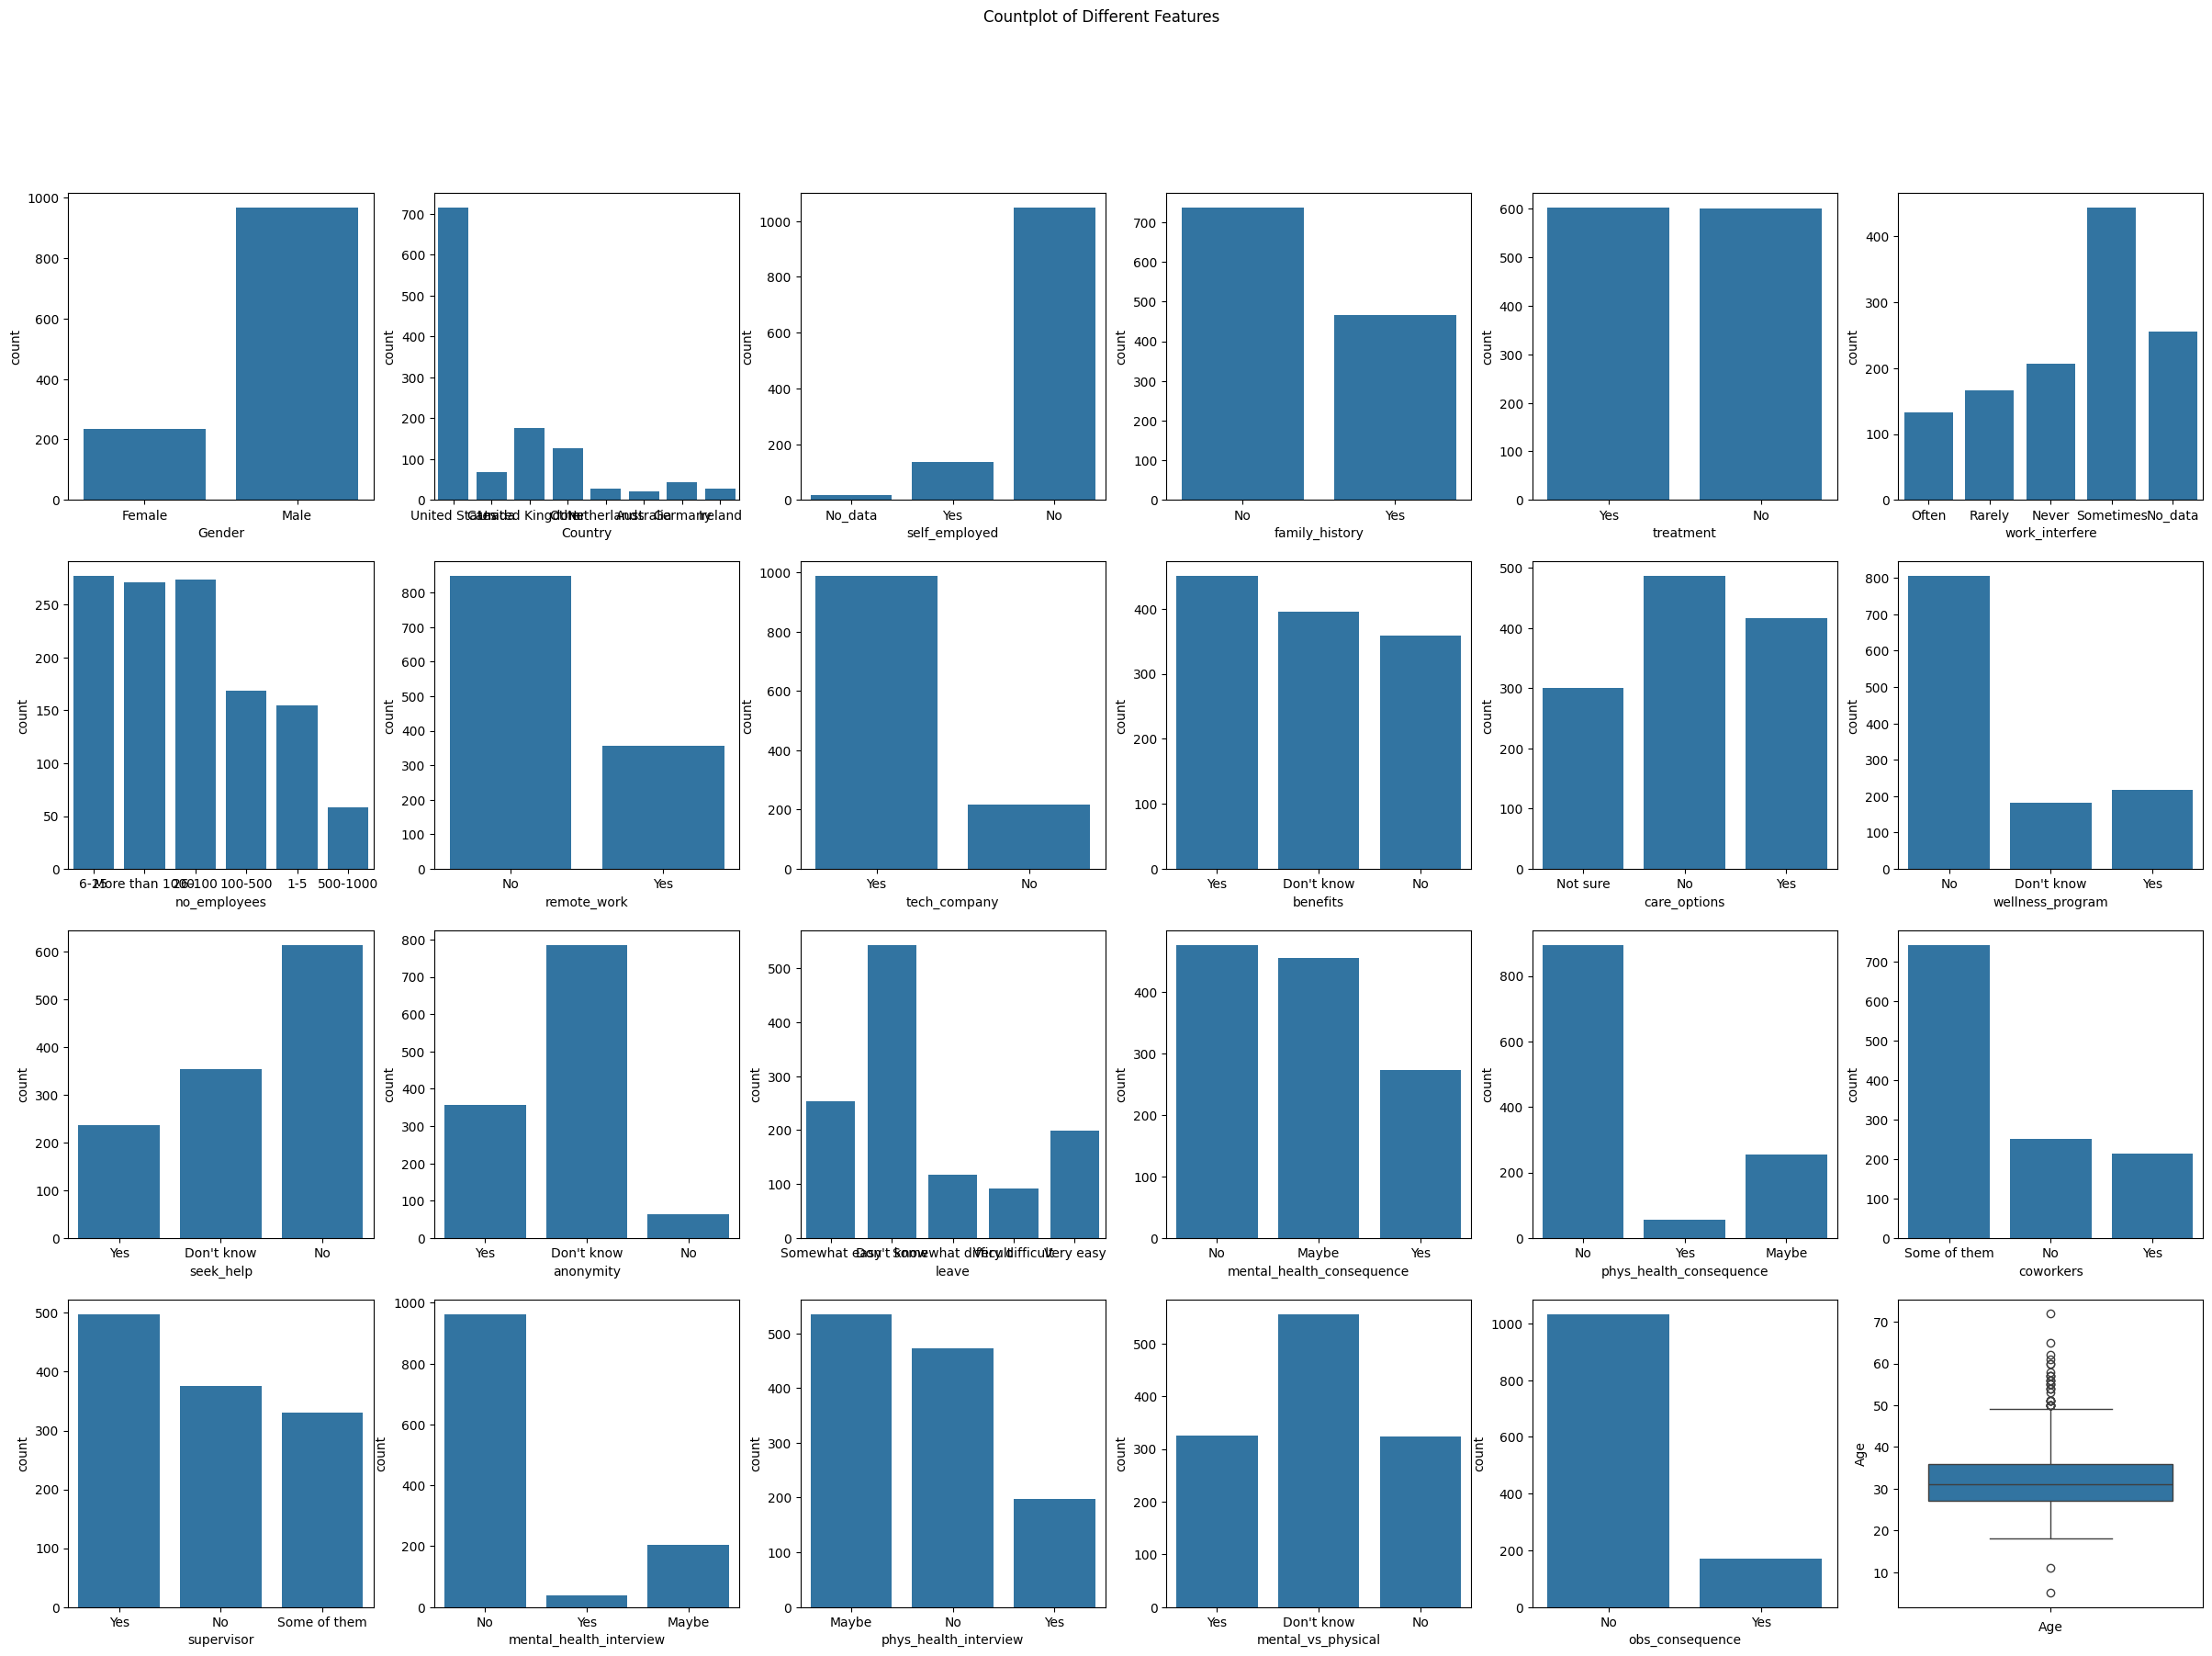

In [8]:
fig,axs=plt.subplots(4,6,figsize=(30,20))
ax=axs.flatten()
for i,ax in enumerate(ax):
    if(i==23):
        sns.boxplot(y=df['Age'],ax=ax)
        ax.set_xlabel("Age")
        break
    sns.countplot(x=df[df.columns[i+1]],ax=ax)
    ax.set_xlabel(f"{df.columns[i+1]}")

    
plt.suptitle("Countplot of Different Features")


([<matplotlib.patches.Wedge at 0x1c585659290>,
 [Text(-0.0028703541780031347, 1.099996255024031, 'Yes'),
  Text(0.00287071260227773, -1.0999962540886925, 'No')],
 [Text(-0.001565647733456255, 0.599997957285835, '50.08%'),
  Text(0.0015658432376060344, -0.5999979567756504, '49.92%')])

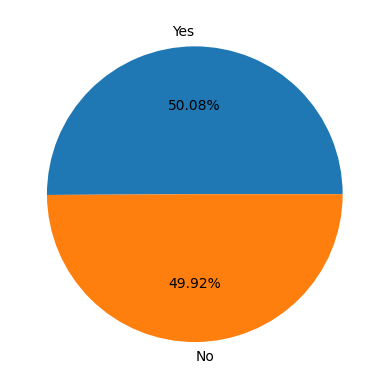

In [9]:
plt.pie(x=df['treatment'].value_counts().values,labels=['Yes', 'No'],autopct='%.2f%%')

Text(0.5, 1.0, 'Histplot of different ages')

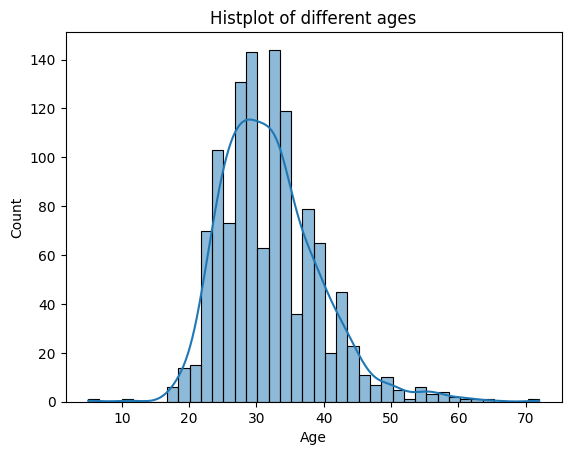

In [10]:
sns.histplot(data=df,x='Age',kde=True)
plt.title("Histplot of different ages")

## Bivariate Analysis

Text(0.5, 0.98, 'Countplot of Different Features')

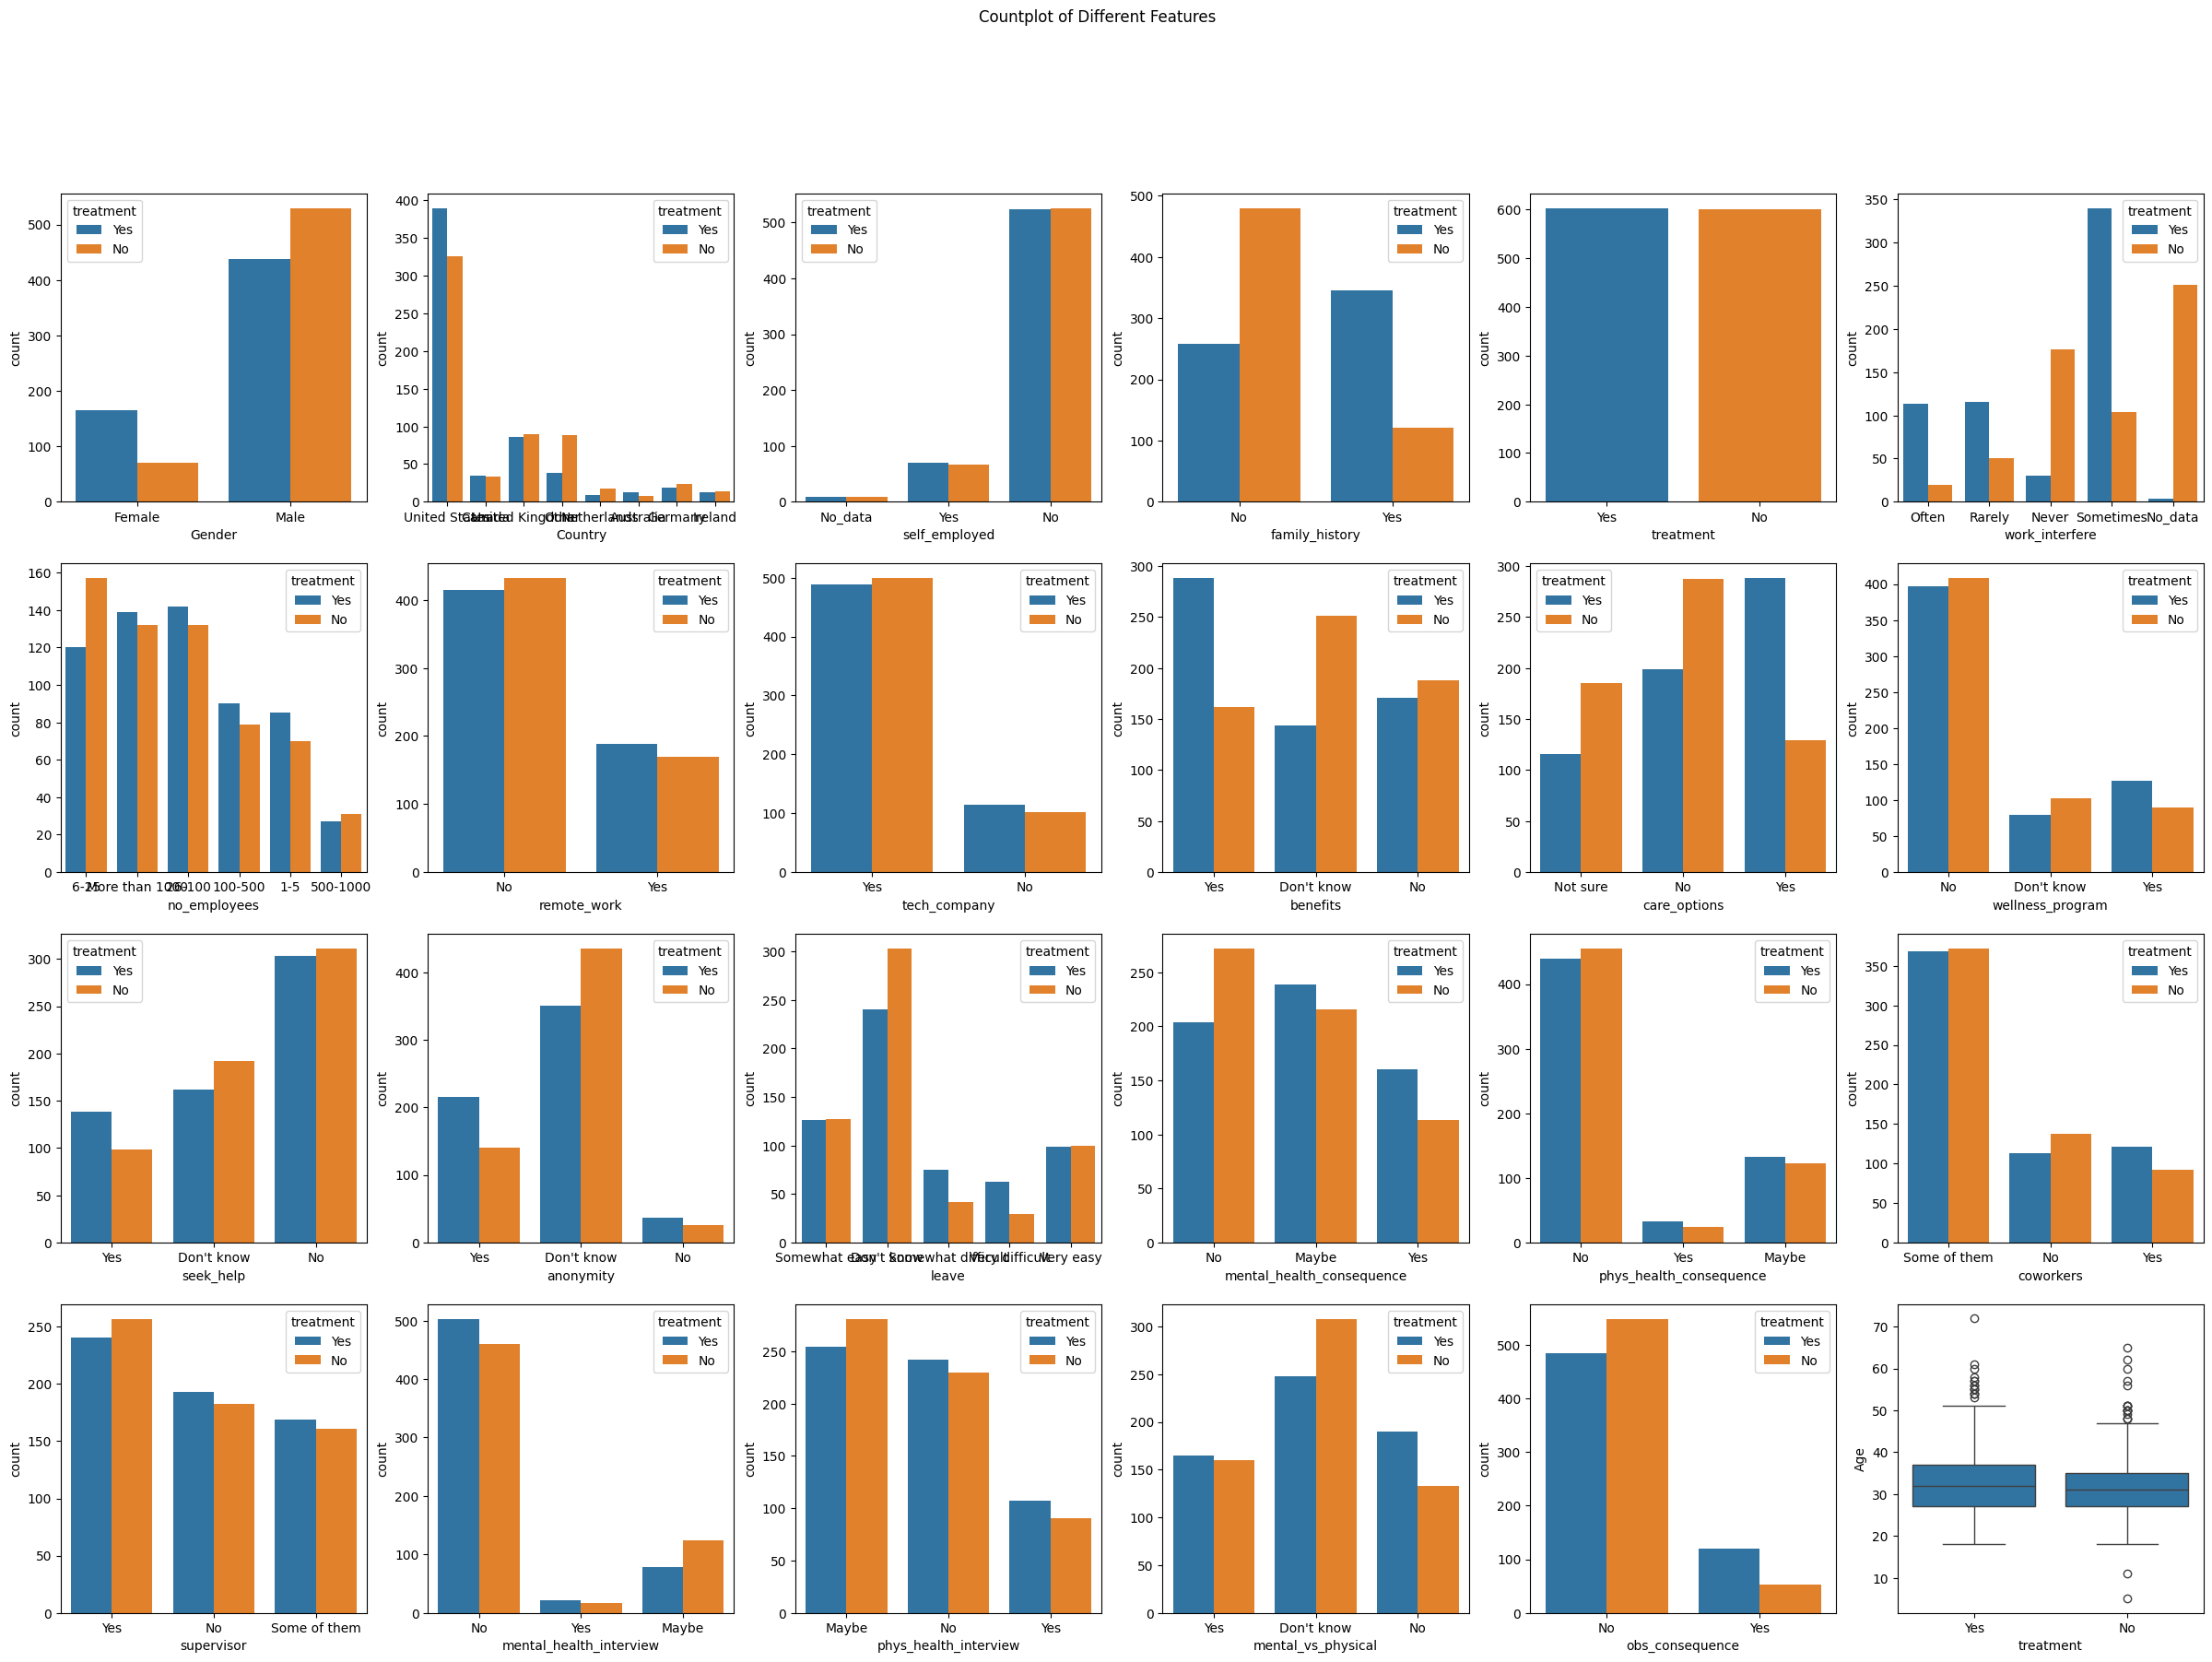

In [11]:
fig,axs=plt.subplots(4,6,figsize=(30,20))
ax=axs.flatten()
for i,ax in enumerate(ax):
    if(i==23):
        sns.boxplot(y=df['Age'],x=df['treatment'],ax=ax)
        ax.set_xlabel("treatment")
        ax.set_ylabel("Age")
        break
    sns.countplot(x=df[df.columns[i+1]],hue=df['treatment'],ax=ax)
    ax.set_xlabel(f"{df.columns[i+1]}")

    
plt.suptitle("Countplot of Different Features")

Text(0.5, 1.0, 'Sharing mental health issue with coworkers and supervisors')

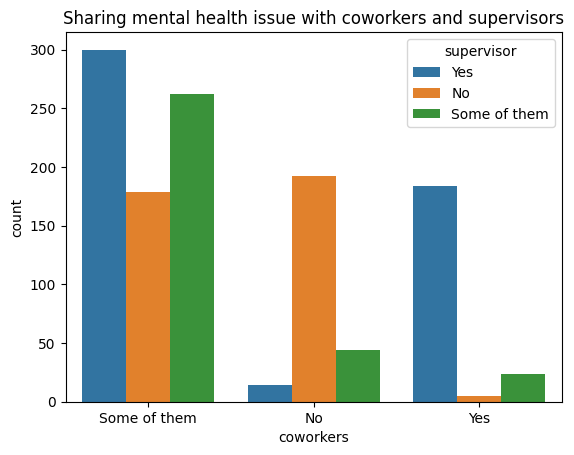

In [12]:
sns.countplot(data=df,x='coworkers',hue='supervisor')
plt.title("Sharing mental health issue with coworkers and supervisors")

## Multivariate Analysis

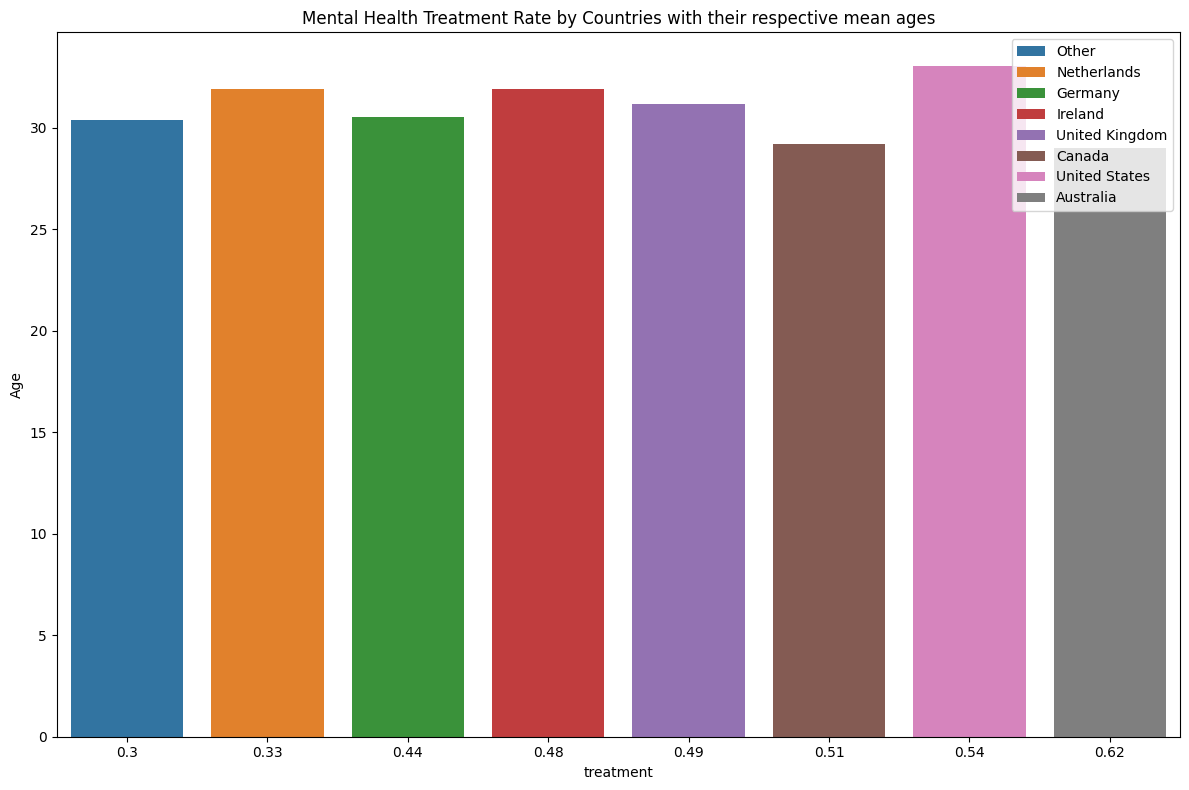

In [13]:
df['treatment']=df['treatment'].map({'Yes':1,'No':0})
df1=df.groupby('Country')[['treatment','Age']].mean().sort_values('treatment',ascending=False)
index=df1.index
df1['treatment']=df1['treatment'].round(2)
fig=plt.figure(figsize=(12,8))
sns.barplot(data=df1,x='treatment',y='Age',hue=index)
plt.title("Mental Health Treatment Rate by Countries with their respective mean ages")
plt.legend()
plt.tight_layout()

<Figure size 1200x2000 with 0 Axes>

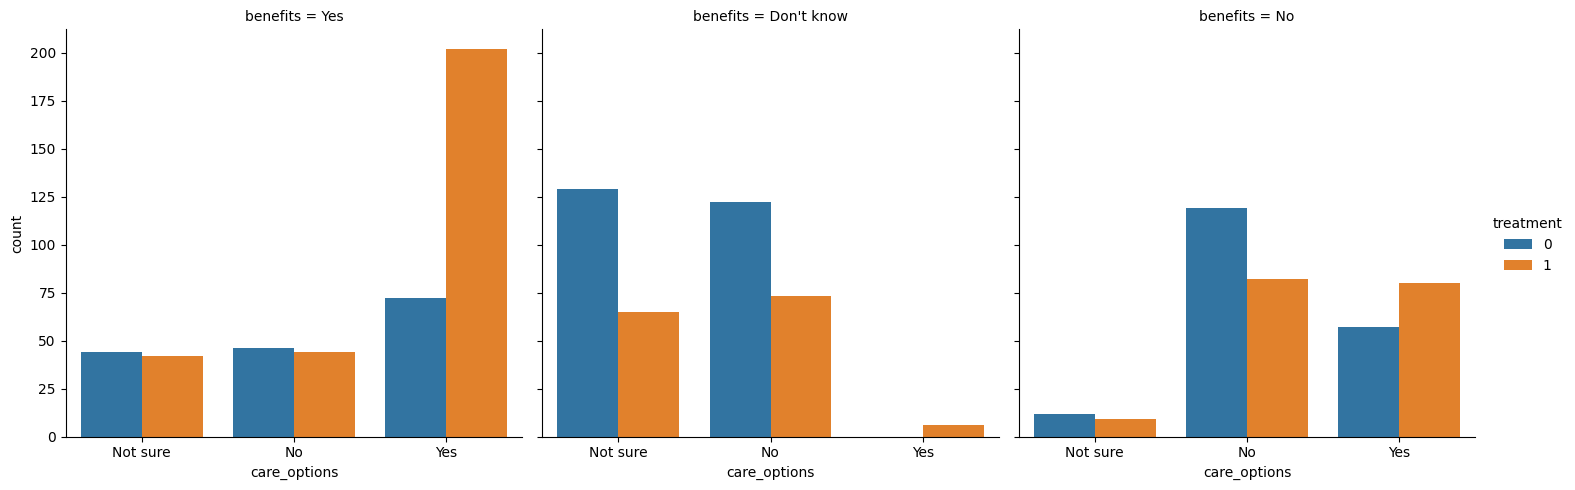

In [14]:
fig=plt.figure(figsize=(12,20))
sns.catplot(data=df,x='care_options',hue='treatment',col='benefits',kind='count')

In [15]:
df.to_csv('df_cleaned.csv')

# Insights from the data




### More ratio of Females seek treatment for a mental health condition than men.

Text(0.5, 1.0, 'Genderwise Treatment status')

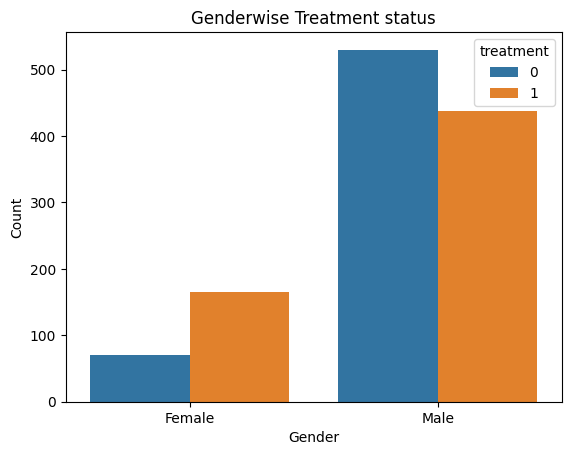

In [17]:

sns.countplot(x=df['Gender'],hue=df['treatment'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Genderwise Treatment status")

### More people with family history of mental illness seek treatment than with no history.


Text(0.5, 1.0, 'Family History Correlation with Treatment')

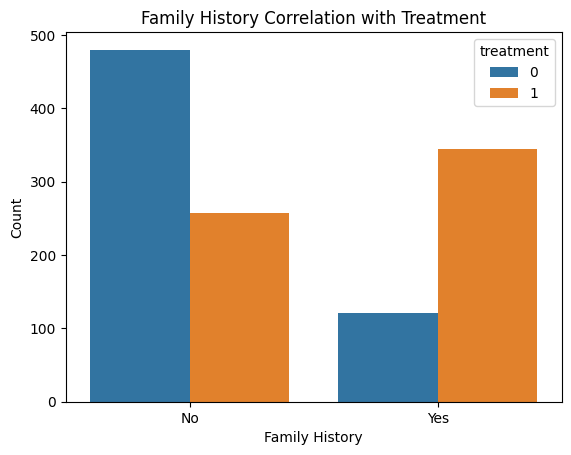

In [18]:
sns.countplot(data=df,x='family_history',hue='treatment')
plt.xlabel("Family History")
plt.ylabel("Count")
plt.title("Family History Correlation with Treatment")

### People with knowledge of benefits and care options seek more treatment

<Figure size 1200x2000 with 0 Axes>

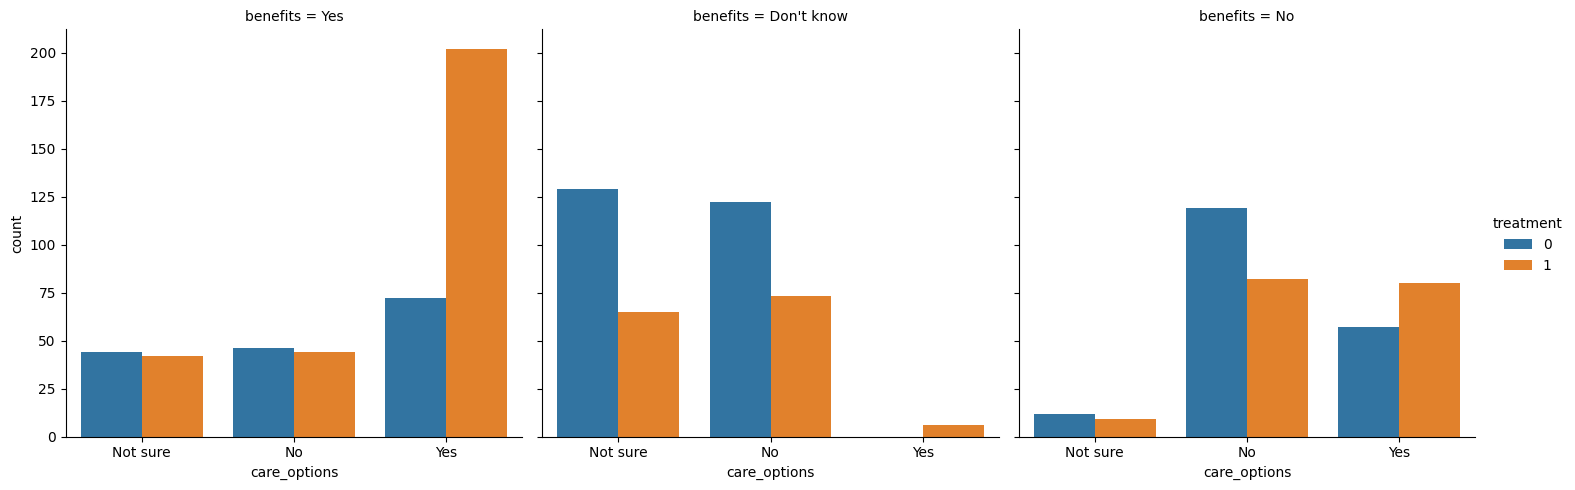

In [ ]:

fig=plt.figure(figsize=(12,20))
sns.catplot(data=df,x='care_options',hue='treatment',col='benefits',kind='count')

### Most of the people who discuss about their mental health issue with their coworkers are also comfortable discussing it with their supervisors.

Text(0.5, 1.0, 'Sharing mental health issue with coworkers and supervisors')

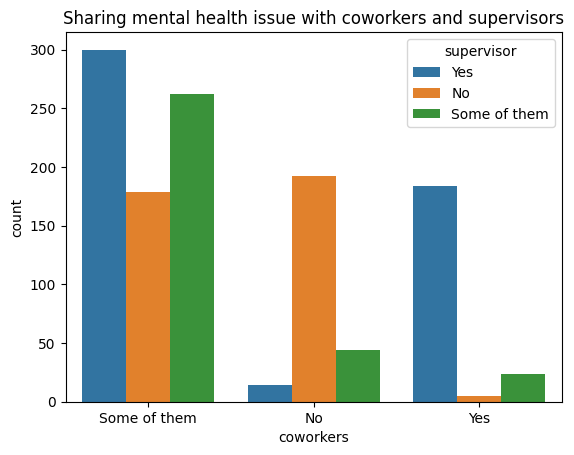

In [21]:
sns.countplot(data=df,x='coworkers',hue='supervisor')
plt.title("Sharing mental health issue with coworkers and supervisors")

### Age has many outliers and has a Non-Gaussian Curve 

Text(0.5, 1.0, 'Histplot of different ages')

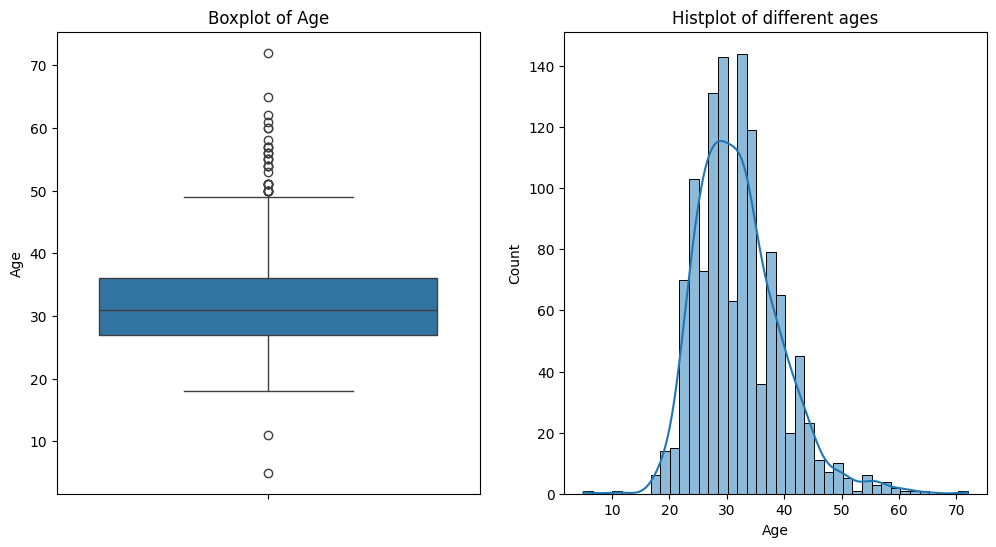

In [30]:
fig,axs=plt.subplots(1,2,figsize=(12,6))
ax=axs.flatten()
sns.boxplot(data=df,y='Age',ax=ax[0])
ax[0].set_ylabel("Age")
ax[0].set_title("Boxplot of Age")
sns.histplot(data=df,x='Age',kde=True,ax=ax[1])
ax[1].set_title("Histplot of different ages")

### Australia has highest treatment mean with lowest mean of ages while US has second highest treatment mean with highest mean of ages.So age doesn't seem to be a major factor for treatment.

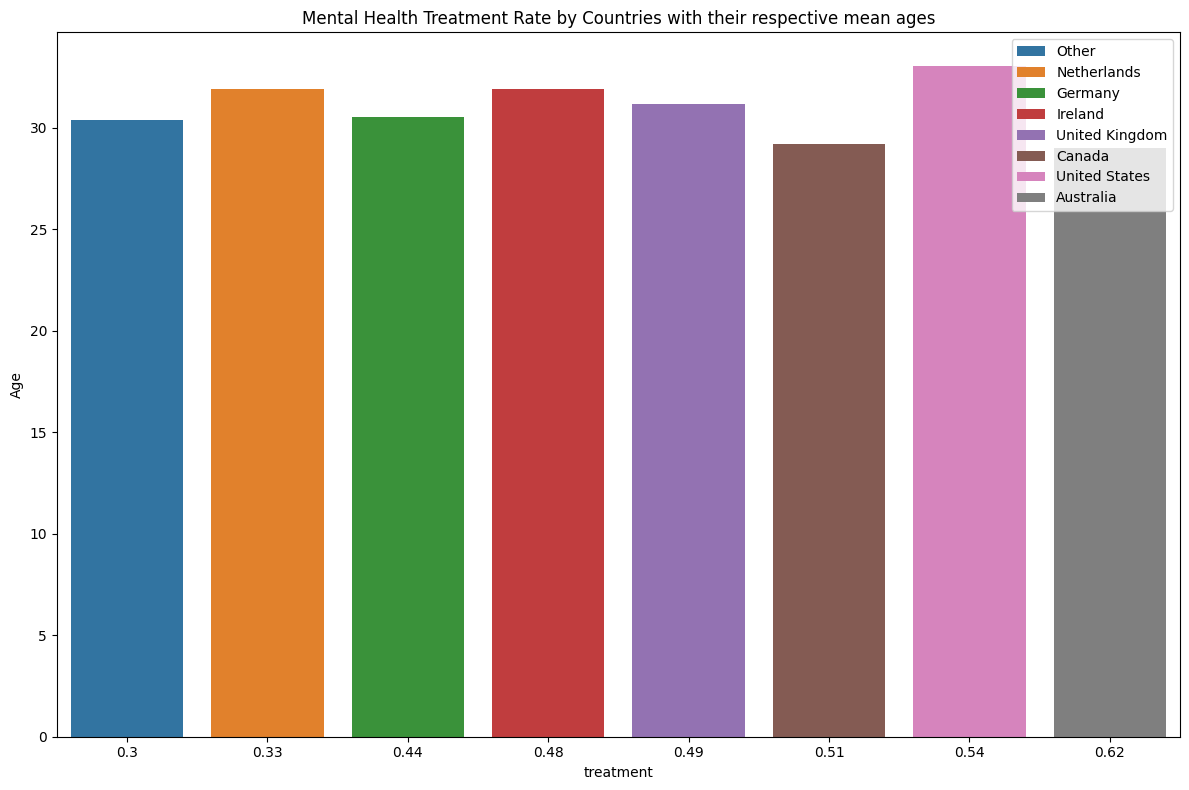

In [31]:
fig=plt.figure(figsize=(12,8))
sns.barplot(data=df1,x='treatment',y='Age',hue=index)
plt.title("Mental Health Treatment Rate by Countries with their respective mean ages")
plt.legend()
plt.tight_layout()